In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error

In [5]:
data=pd.read_csv("Coca_Cola_historical_data.csv")
#print first 5 rows
data.head()

,Date,Open,High,Low,Close,Volume,ticker,name
0,1962-01-02 00:00:00-05:00,0.045368,0.046604,0.045368,0.045368,806400,KO,The Coca-Cola Company (KO) Historical Data
1,1962-01-03 00:00:00-05:00,0.044695,0.044695,0.043684,0.044358,1574400,KO,The Coca-Cola Company (KO) Historical Data
2,1962-01-04 00:00:00-05:00,0.044470,0.045032,0.044470,0.044695,844800,KO,The Coca-Cola Company (KO) Historical Data
3,1962-01-05 00:00:00-05:00,0.044695,0.045256,0.043572,0.043684,1420800,KO,The Coca-Cola Company (KO) Historical Data
4,1962-01-08 00:00:00-05:00,0.043347,0.043347,0.042393,0.043235,2035200,KO,The Coca-Cola Company (KO) Historical Data


In [6]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16059 entries, 0 to 16058
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    16059 non-null  object 
 1   Open    16059 non-null  float64
 2   High    16059 non-null  float64
 3   Low     16059 non-null  float64
 4   Close   16059 non-null  float64
 5   Volume  16059 non-null  int64  
 6   ticker  16059 non-null  object 
 7   name    16059 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1003.8+ KB


In [7]:
#to check date is repeated or not in dataset
print(f"there are total days ,{data["Date"].count()},from those are unquiedays{data["Date"].nunique()}")

there are total days ,16059,from those are unquiedays16059


In [8]:
#missing dates
missing_dates = data["Date"].isna().sum()
if missing_dates>0:
    print(f"Found {missing_dates} missing or invalid data entries. Consider hamdling them")
else:
    print("all date conveted ")

all date conveted 


In [9]:
#missing dats
missing_value= data.isnull().sum()
print(missing_value)

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
ticker    0
name      0
dtype: int64


In [10]:
# copy of dataset
df=data.copy()
print("types of data")
print(df.dtypes)
print("\n")
print("shape of dataset")
print(df.shape)
print("\n")
print(df.describe())

types of data
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
ticker     object
name       object
dtype: object


shape of dataset
(16059, 8)


               Open          High           Low         Close        Volume
count  16059.000000  16059.000000  16059.000000  16059.000000  1.605900e+04
mean      13.122637     13.222493     13.019985     13.125095  9.392470e+06
std       17.136370     17.252650     17.015040     17.137581  7.961349e+06
min        0.033701      0.033815      0.031648      0.033587  7.680000e+04
25%        0.221310      0.223183      0.219731      0.221352  3.168000e+06
50%        4.804177      4.843529      4.763778      4.806314  8.181200e+06
75%       17.601507     17.739118     17.483380     17.610758  1.338480e+07
max       72.307414     73.292796     71.854138     72.819817  1.241690e+08


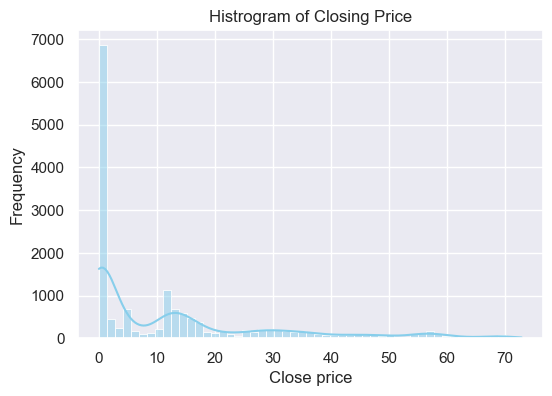

In [11]:
#histogram for "close " prices
plt.figure(figsize=(6,4))
sns.histplot(df["Close"],kde=True,color="skyblue")
plt.title("Histrogram of Closing Price")
plt.xlabel("Close price")
plt.ylabel("Frequency")
plt.show()

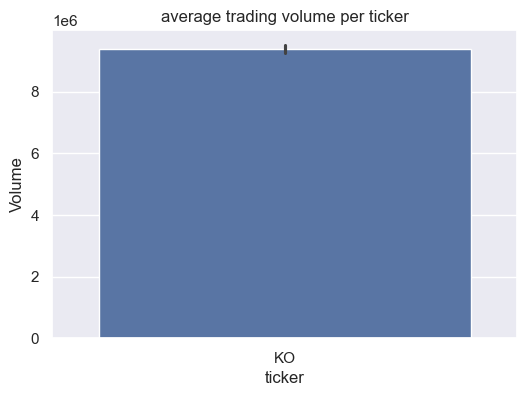

In [12]:
#barplot for average volume per tick
plt.figure(figsize=(6,4))
sns.barplot(x="ticker",y="Volume",data=df)
plt.title("average trading volume per ticker")
plt.show()

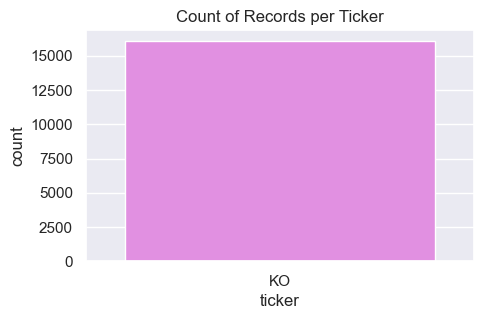

In [13]:
#counterplot for catergorical  variable"ticker"
plt.figure(figsize=(5,3))
sns.countplot(x="ticker",data=df,color="violet")
plt.title("Count of Records per Ticker")
plt.show()

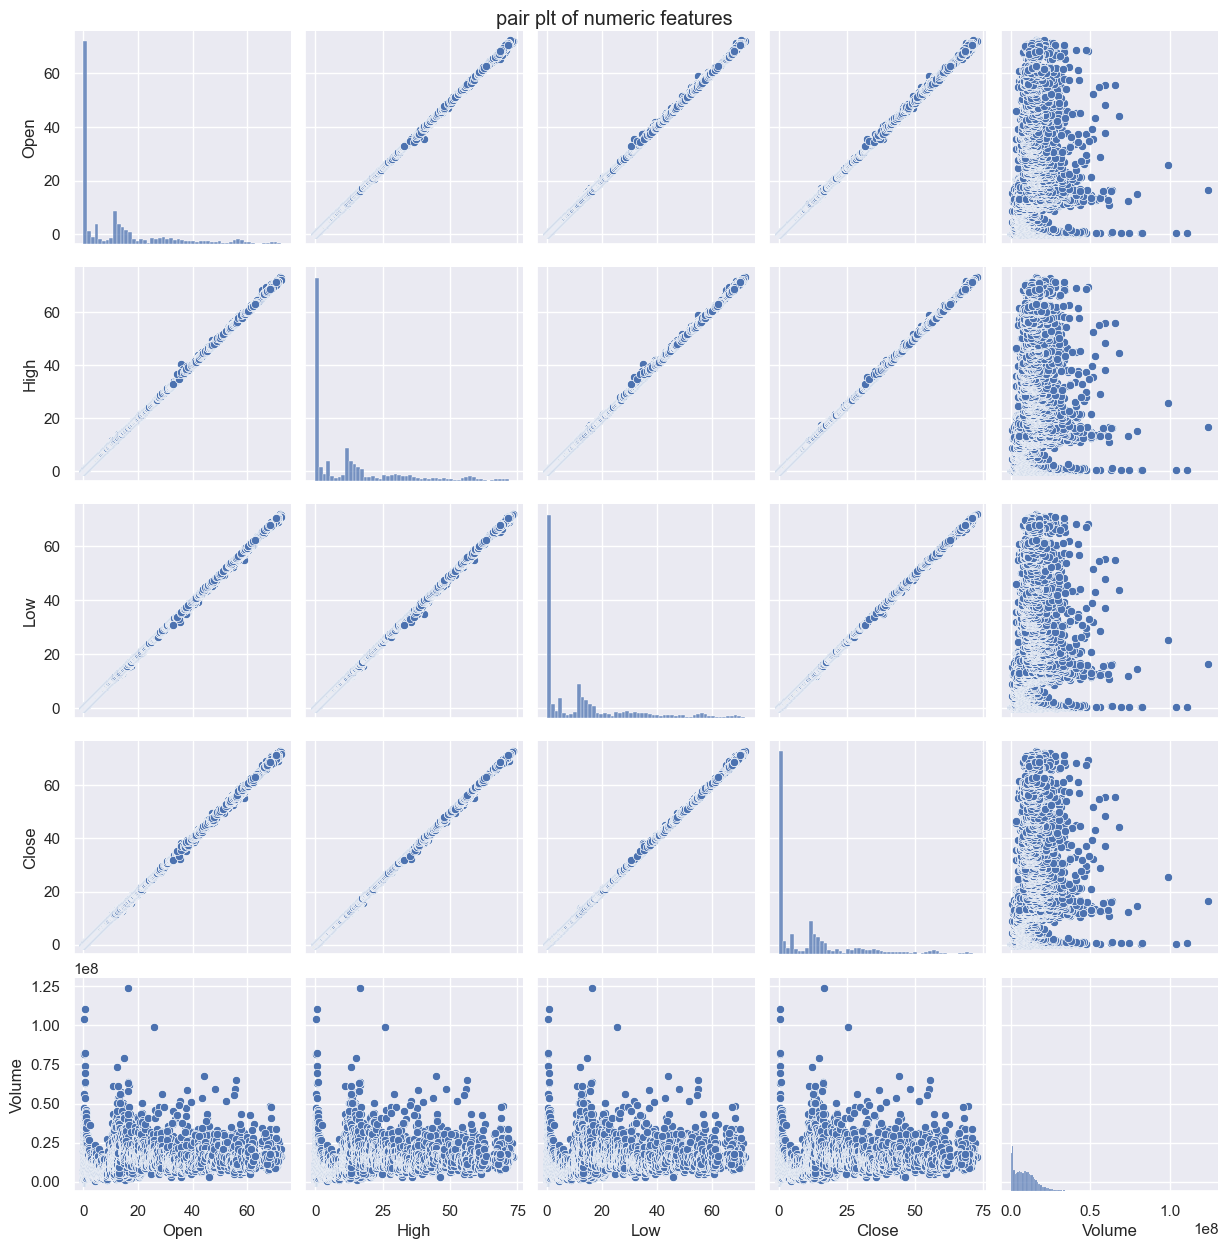

In [14]:
sns.pairplot(df)
plt.suptitle("pair plt of numeric features",y=1)
plt.show()


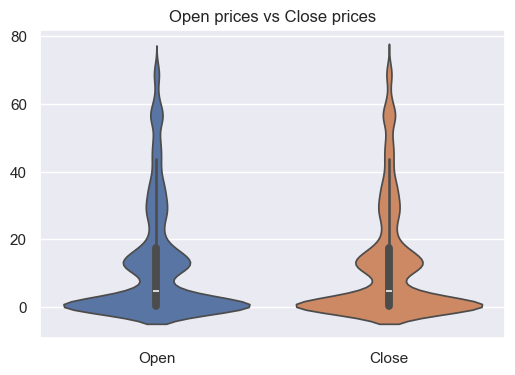

In [15]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df[["Open","Close"]])
plt.title("Open prices vs Close prices")
plt.show()

In [16]:
#assining the input and output values for model prediction
input_data=["Open","Volume","High","Low"]
output=["Close"]
x=df[input_data]
y=df[output]
print(x)
print("\n",y)

            Open    Volume       High        Low
0       0.045368    806400   0.046604   0.045368
1       0.044695   1574400   0.044695   0.043684
2       0.044470    844800   0.045032   0.044470
3       0.044695   1420800   0.045256   0.043572
4       0.043347   2035200   0.043347   0.042393
...          ...       ...        ...        ...
16054  67.269997  11193700  67.720001  66.919998
16055  67.180000  15707200  68.110001  67.160004
16056  68.000000  15541800  68.500000  67.800003
16057  68.430000  17786800  68.639999  67.919998
16058  70.570000  33635200  71.389999  70.230003

[16059 rows x 4 columns]

            Close
0       0.045368
1       0.044358
2       0.044695
3       0.043684
4       0.043235
...          ...
16054  67.080002
16055  67.589996
16056  68.440002
16057  68.440002
16058  71.220001

[16059 rows x 1 columns]


In [17]:
#training the data for predections
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,test_size=0.4,shuffle=False)
print("training data of x:" ,"\n",        x_train,len(x_train))
print("--------------------------------------------------------------------------------")
print("testing data of x:" ,"\n",         x_test,len(x_test))
print("--------------------------------------------------------------------------------")
print("training data of y:","\n"   ,y_train,len(y_train))
print("---------------------------------------------------------------------------------")
print("testing data of y:"   ,"\n"         ,y_test,len(y_test))

training data of x: 
            Open    Volume       High        Low
0      0.045368    806400   0.046604   0.045368
1      0.044695   1574400   0.044695   0.043684
2      0.044470    844800   0.045032   0.044470
3      0.044695   1420800   0.045256   0.043572
4      0.043347   2035200   0.043347   0.042393
...         ...       ...        ...        ...
9630  11.503929  18795200  12.190503  11.503929
9631  11.854846   8857000  11.885360  11.458158
9632  11.534447  14186800  12.190507  11.534447
9633  12.037939  27390200  12.785542  11.763309
9634  12.434626  20256600  12.434626  11.564965

[9635 rows x 4 columns] 9635
--------------------------------------------------------------------------------
testing data of x: 
             Open    Volume       High        Low
9635   11.625994  20675000  11.702280  10.924162
9636   11.168275  12374000  11.336105  10.924160
9637   11.275077  12903000  11.519193  10.954676
9638   11.153015  12096400  11.656503  11.153015
9639   11.641247  1558640

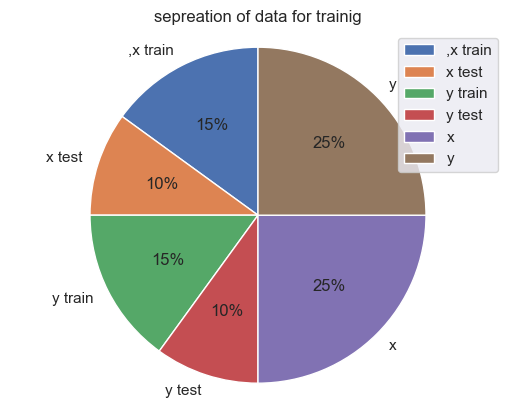

In [18]:
labels=(",x train","x test","y train","y test","x","y")
sizes=[len(x_train),len(x_test),len(y_train),len(y_test),len(x),len(y)]
colors=["skyblues","green","orange"]
plt.pie(sizes,labels=labels,autopct="%1.0f%%",startangle=90)
plt.axis("equal")
plt.legend()
plt.title("sepreation of data for trainig")
plt.show()

In [19]:
#linear regression model
linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
#calculating r2 score vale
r2=r2_score(y_test,y_pred)
print(f"Linear regression R-squared score:{r2:.4f}")

Linear regression R-squared score:0.9999


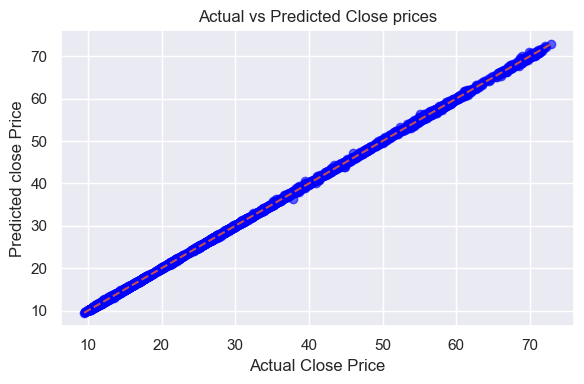

In [20]:
#scatter plot of actual vs predicted close prices
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred,alpha=0.6,color="blue")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted close Price")
plt.title("Actual vs Predicted Close prices")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--")
plt.tight_layout()
plt.show()

In [23]:
# Calculate Mean Squared Error for the Linear Regression model
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f"Mean Squared Error for Linear Regression: {mse:.4f}")

Mean Squared Error for Linear Regression: 0.0212
